In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [2]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

In [3]:
df

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6
5,15.5,75.2
6,14.7,69.7
7,15.7,71.6
8,15.4,69.4
9,16.3,83.3


In [4]:
df.columns = ['Chirps_per_Second','Ground Temperature']

In [5]:
x = df[["Ground Temperature"]].values
y = df[["Chirps_per_Second"]].values

In [6]:
# from sklearn.model_selection import train_test_split
# x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=1,test_size=0.28)

In [7]:
# print(x_train.shape)
# print(x_test.shape)
x

array([[88.6],
       [71.6],
       [93.3],
       [84.3],
       [80.6],
       [75.2],
       [69.7],
       [71.6],
       [69.4],
       [83.3],
       [79.6],
       [82.6],
       [80.6],
       [83.5],
       [76.3]])

In [8]:
# x_test

In [9]:
from sklearn.linear_model import LinearRegression
lnreg = LinearRegression()
lnreg.fit(x,y)
y_pred = lnreg.predict(x)

## Find the linear regression equation for this data.
**y=mx+c**
* y= output
* m= slope
* x= variable
* c= intercept

In [10]:
print( "The linear regression equation for this data:\ny={:.4f} + x*{:.4f}".format(lnreg.intercept_[0],lnreg.coef_[0][0]))

The linear regression equation for this data:
y=0.4593 + x*0.2030


In [11]:
# lnreg.intercept_[0]
# lnreg.coef_[0][0]

## Chart the original data and the equation on the char

In [12]:
def crips_temp_model():
    plt.scatter(x,y,color="r")
    plt.plot(x,y_pred,color="k")
    plt.title("Chart the original data and the equation on the chart",color='g')
    plt.xlabel("Ground_Temperature",color='b')
    plt.ylabel("Chrips_per_second",color='b')

## Find the equation's  𝑅2
score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

**The score is below 0.8 hence it is not a good fit for this data**

In [13]:
lnreg.score(x,y)

0.6922946529147005

## Extrapolate data: 
If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?

In [14]:
print("when ground temperature {} is the chriping per sound may be {:.4f} ".format("95",lnreg.predict([[95]])[0][0]))

when ground temperature 95 is the chriping per sound may be 19.7443 


## Interpolate data:
With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second. What was the approximate ground temperature that morning?

* y = mx+c
* y = 18
* m = lnreg.coef_
* c = lnreg.intercept_
* x = ?
* (y-c)/m = x

In [15]:
y = 18
x = ((y-lnreg.intercept_[0])/lnreg.coef_[0][0])
print("when the crips per second {} is {:.4f}".format(y,x))

when the crips per second 18 is 86.4074


In [16]:
y_t = df[["Chirps_per_Second"]].values
x_t = df[["Ground Temperature"]].values
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_t,y_t,random_state=3,test_size=0.3)
from sklearn.linear_model import LinearRegression
lnreg_tts = LinearRegression()
lnreg_tts.fit(x_train,y_train)
y_pred = lnreg_tts.predict(x_test) # extrapolated the 95

In [17]:
y_pred

array([[16.73866039],
       [16.73866039],
       [14.80939874],
       [14.40211018],
       [19.46106293]])

In [18]:
extrapolate =  lnreg_tts.predict([[95]])
print("when ground temperature {} is the chriping per sound may be {:.4f} ".format("95",extrapolate[0][0]))

when ground temperature 95 is the chriping per sound may be 19.8255 


In [19]:
ytt = 18
xtt = ((ytt-lnreg_tts.intercept_[0])/lnreg_tts.coef_[0][0])
print("when the crips per second {} groud temperature is {:.4f}".format(ytt,xtt))

when the crips per second 18 groud temperature is 86.4841


In [20]:
lnreg.score(x_test,y_test) # trained only on the random state of 3 seems performing well

0.8689403880673913

Text(0, 0.5, 'Chrips_per_second')

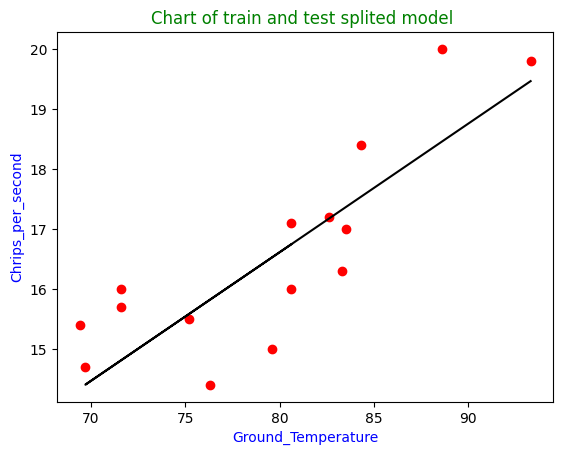

In [21]:
plt.scatter(x_t,y_t,color="r")
plt.plot(x_test,y_pred,color="k")
plt.title("Chart of train and test splited model ",color='g')
plt.xlabel("Ground_Temperature",color='b')
plt.ylabel("Chrips_per_second",color='b')

# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [22]:
df_bb = pd.read_fwf("brain_body.txt")

In [23]:
df_bb

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5
...,...,...
57,160.000,169.0
58,0.900,2.6
59,1.620,11.4
60,0.104,2.5


In [67]:
X = df_bb[["Brain"]]
y = df_bb[["Body"]]

In [68]:
liner_reg = LinearRegression()
liner_reg.fit(X,y)
y_pred_bb =liner_reg.predict(X)

In [69]:
print( "The linear regression equation for this data:\ny={:.4f} + x*{:.4f}".format(liner_reg.intercept_[0],liner_reg.coef_[0][0]))

The linear regression equation for this data:
y=91.0044 + x*0.9665


In [70]:
%matplotlib notebook
def brain_body_model():
    plt.scatter(X,y,color="m")
    plt.plot(X,y_pred_bb,color="k")
    plt.title("Chart the original data and the equation on the chart",color='g')
    plt.xlabel("Body weight ",color='k')
    plt.ylabel("Brain average_weight",color='k')

<IPython.core.display.Javascript object>


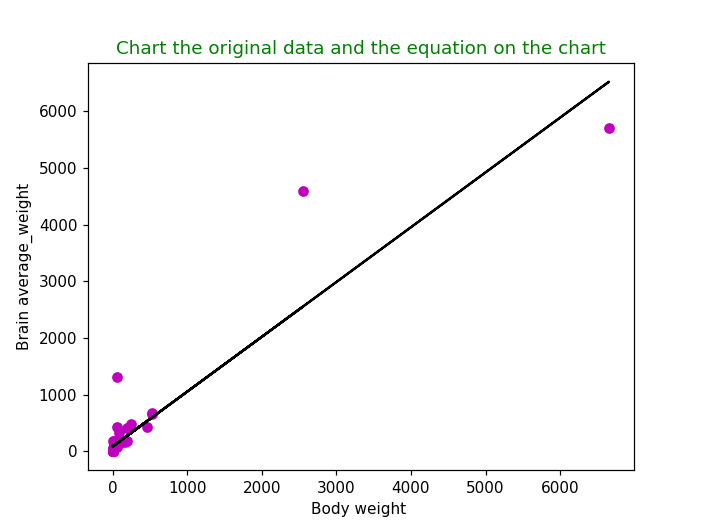

In [71]:
brain_body_model()

In [72]:
liner_reg.score(X,y)

0.8726620843043331

In [73]:
liner_reg.predict(X)

array([[  94.27598641],
       [  91.46831446],
       [  92.3091663 ],
       [ 540.42520718],
       [ 126.11720924],
       [ 117.73768574],
       [ 105.33753734],
       [  92.00955243],
       [  95.05401599],
       [  91.41515716],
       [  91.10201234],
       [  91.89357287],
       [  91.97089258],
       [  91.00922869],
       [  91.06238599],
       [  94.38713349],
       [  92.93738894],
       [  92.64744003],
       [2552.67064467],
       [  91.02662562],
       [ 271.8358666 ],
       [ 594.54900376],
       [  91.76309586],
       [ 100.66935988],
       [  94.19383422],
       [  91.19769548],
       [  92.36715609],
       [ 602.28097471],
       [ 291.06914432],
       [ 173.15658746],
       [  91.72926848],
       [ 150.927171  ],
       [6522.0712267 ],
       [  94.38713349],
       [  97.57657151],
       [ 124.83176908],
       [  94.9187065 ],
       [  91.12037577],
       [  91.02662562],
       [  91.01406117],
       [  92.35749112],
       [ 332.628

# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [ ]:
df_s = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [ ]:
df

In [ ]:
x = df_s.iloc[:,:-1]
y = df_s.iloc[:,-1]

In [ ]:
salary_model = LinearRegression()
salary_model.fit(x.values,y)

In [ ]:
salary_model.score(x.values,y) # correlation seems good

In [ ]:
print("Intercept and coef:\n",salary_model.intercept_,"\n",salary_model.coef_)

In [ ]:
df_s.corr()

# salary has strong correlation with 
1. Rank
2. Years
3. YSdeg
* `Salary` and `sex` have correlation in slight negative manner

In [ ]:
import statsmodels.formula.api as st

In [ ]:
x = np.append(arr =np.ones(shape=(df_s.shape[0],1)) ,values = x ,axis = 1)

In [ ]:
import statsmodels.regression.linear_model as sts
def ols_fun(value):
    ols_model=sts.OLS(endog = y, exog = value).fit()
    return ols_model.summary()

In [ ]:
x_be = df_s.iloc[:,[0,1,2,3,4]]
x_be.values

In [ ]:
y=df_s["Salary"]

In [ ]:
def m(x):
    model1 = LinearRegression()
    model1.fit(x,y)
    return model1.score(x,y)

In [ ]:
x_be1=df_s.iloc[:,1:-1]

In [ ]:
x_be2=df_s.iloc[:,1:-2]

In [ ]:
x_be3=df_s.iloc[:,1:-3]

In [ ]:
m(x_be)

In [ ]:
m(x_be1)

In [ ]:
m(x_be2)

In [ ]:
m(x_be3)

**Hence maximum r2 score attained with all the feature hence feature elimination is not required**
> Maxmium score is `0.0.8547180674410969`